In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
data=pd.read_csv("IMDb.csv", encoding='ISO-8859-1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [7]:
data.shape

(15509, 10)

In [8]:
data.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]>

In [11]:
data_new = data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


In [12]:
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


In [13]:
data_new = data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


In [45]:
data_new['Duration']=data_new['Duration'].str.replace(' min', '')
data_new['Votes']=data_new['Votes'].str.replace(',', '')
data_new['Votes']=data_new['Votes'].replace('$5.16M', 5.16)

In [46]:
data_new.dropna(subset=['Duration','Votes','Rating'], inplace=True)

In [47]:
data_new.head()

,Duration,Rating,Votes
1,109,7.0,8
3,110,4.4,35
5,147,4.7,827
6,142,7.4,1086
8,82,5.6,326


In [48]:
x=data_new.drop(['Rating'], axis=1)
y=data_new['Rating']

In [49]:
print(x)

      Duration Votes
1          109     8
3          110    35
5          147   827
6          142  1086
8           82   326
...        ...   ...
15493      115   408
15494      153  1496
15503      125    44
15505      129   655
15508      130    20

[5851 rows x 2 columns]


In [50]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5851, dtype: float64


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=22)

In [54]:
GBR=GradientBoostingRegressor(n_estimators=2500, learning_rate=0.8, random_state=22)

In [55]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.8, n_estimators=2500, random_state=22)

In [56]:
gbr_pred=GBR.predict(x_test)

In [57]:
print(r2_score(y_test, gbr_pred))

-0.6293263269082745


In [60]:
data2=data.dropna()
data2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<ipython-input-63-ae742171a140>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snr.distplot(data2['Rating'], color='green')


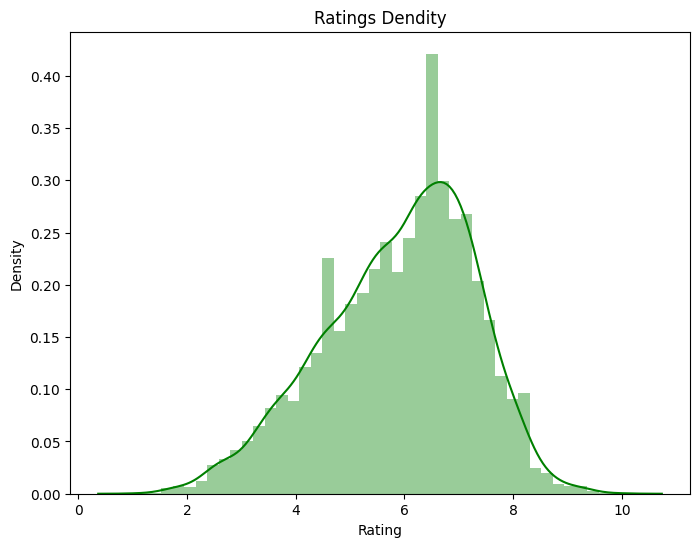

In [63]:
plt.figure(figsize=(8, 6))
snr.distplot(data2['Rating'], color='green')
plt.title('Ratings Dendity')
plt.show()